## Matplotlib 三维图形绘制方法


#### 介绍

Matplotlib 是支持 Python 语言的开源绘图库，因为其支持丰富的绘图类型、简单的绘图方式以及完善的接口文档，深受 Python 工程师、科研学者、数据工程师等各类人士的喜欢。本次实验课程中，我们将学会使用 Matplotlib 绘图的方法和技巧。

#### 知识点

- 三维图形绘制
- 三维混合图
- 三维子图

### 三维图形绘制

前面，我们已经了解了如果使用 Matplotlib 中的 pyplot 模块绘制简单的 2D 图像。其实，Matplotlib 也可以绘制 3D 图像，与二维图像不同的是，绘制三维图像主要通过 `mplot3d` 模块实现。但是，使用 Matplotlib 绘制三维图像实际上是在二维画布上展示，所以一般绘制三维图像时，同样需要载入 `pyplot` 模块。


`mplot3d` 模块下主要包含 4 个大类，分别是：


- `mpl_toolkits.mplot3d.axes3d()`
- `mpl_toolkits.mplot3d.axis3d()`
- `mpl_toolkits.mplot3d.art3d()`
- `mpl_toolkits.mplot3d.proj3d()`


其中，`axes3d()` 下面主要包含了各种实现绘图的类和方法。`axis3d()` 主要是包含了和坐标轴相关的类和方法。`art3d()` 包含了一些可将 2D 图像转换并用于 3D 绘制的类和方法。`proj3d()` 中包含一些零碎的类和方法，例如计算三维向量长度等。


一般情况下，我们用到最多的就是 `mpl_toolkits.mplot3d.axes3d()` 下面的 `mpl_toolkits.mplot3d.axes3d.Axes3D()` 类，而 `Axes3D()` 下面又存在绘制不同类型 3D 图的方法。


下面，我们通过几组示例，来学习 Matplotlib 绘制三维图形。首先，是三维散点图的绘制。



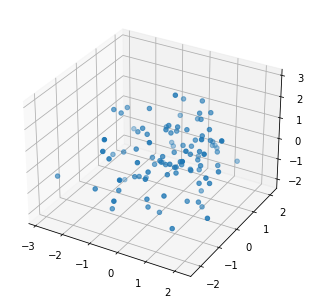

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# x, y, z 均为 100 个随机数
x = np.random.normal(0, 1, 100)
y = np.random.normal(0, 1, 100)
z = np.random.normal(0, 1, 100)

fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(x, y, z)

三维图形和二维图形在数据上的区别在于，三维图形多了一组数据用于度量多出来的一个维度。

当我们在桌面环境中绘制 3D 图形时，是可以通过鼠标任意拖动角度的，但在 Jupyter Notebook 环境中不支持，只会展示三维图形的默认视角静态图像。

线形图和散点图相似，需要传入 $x, y, z$ 三个坐标的数值。详细的代码如下。

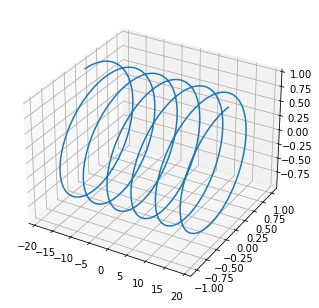

In [3]:
# 生成数据
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
y = np.sin(x)
z = np.cos(x)

# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z)

绘制完线型图，我们继续尝试绘制三维柱状图，其实它的绘制步骤和上面同样非常相似。

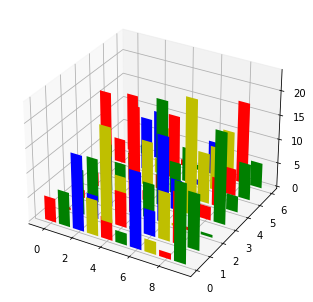

In [4]:
# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)

# 生成数据并绘图
x = [0, 1, 2, 3, 4, 5, 6]
for i in x:
    y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    z = abs(np.random.normal(1, 10, 10))
    ax.bar(y, z, i, zdir='y', color=['r', 'g', 'b', 'y'])

接下来需要绘制的三维曲面图要麻烦一些，我们需要对数据进行矩阵处理。其实和画二维等高线图很相似，只是多增加了一个维度。

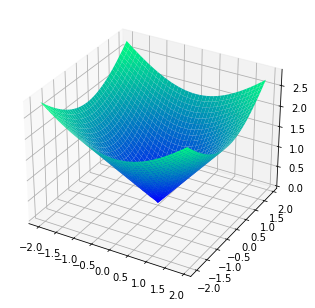

In [5]:
# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)

# 生成数据
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X ** 2 + Y ** 2)

# 绘制曲面图，并使用 cmap 着色
ax.plot_surface(X, Y, Z, cmap=plt.cm.winter)

`cmap=plt.cm.winter` 表示采用了 `winter` 配色方案。除了通过 `Axes3D()` 声明三维图形，我们也可以通过 `projection='3d'` 参数声明 3D 图形。

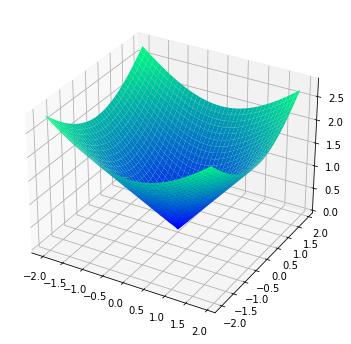

In [6]:
fig = plt.figure(figsize=(14, 6))

# 通过 projection='3d' 声明绘制 3D 图形
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.winter)

### 三维混合图
混合图就是将两种不同类型的图绘制在一张图里。绘制混合图一般有前提条件，那就是两种不同类型图的范围大致相同，否则将会出现严重的比例不协调，而使得混合图失去意义。

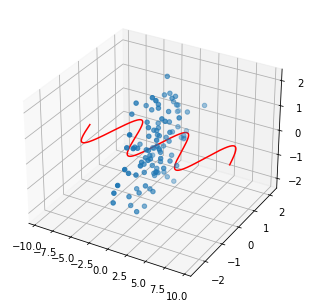

In [7]:
# 创建 3D 图形对象
fig = plt.figure()
ax = Axes3D(fig)

# 生成数据并绘制图 1
x1 = np.linspace(-3 * np.pi, 3 * np.pi, 500)
y1 = np.sin(x1)
ax.plot(x1, y1, zs=0, c='red')

# 生成数据并绘制图 2
x2 = np.random.normal(0, 1, 100)
y2 = np.random.normal(0, 1, 100)
z2 = np.random.normal(0, 1, 100)
ax.scatter(x2, y2, z2)

### 三维子图
我们已经学习过二维子图的绘制，其实三维情况下也是一样的。我们可以将二维图像和三维图像绘制在一起，又或者将几个三维图像绘制在一起。这里我们就拿上面绘制过的线形图和曲面图为例，看一看需要增删哪些代码。

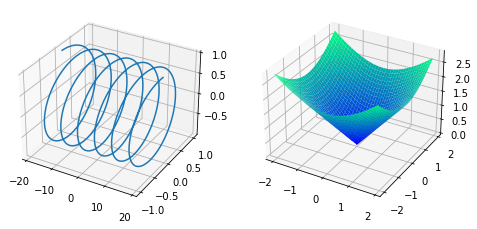

In [8]:
# 创建 1 张画布
fig = plt.figure(figsize=(8, 4))

# 向画布添加子图 1
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
# 生成子图 1 数据
x = np.linspace(-6 * np.pi, 6 * np.pi, 1000)
y = np.sin(x)
z = np.cos(x)
# 绘制第 1 张图
ax1.plot(x, y, z)

# 向画布添加子图 2
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# 生成子图 2 数据
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X ** 2 + Y ** 2)
# 绘制第 2 张图
ax2.plot_surface(X, Y, Z, cmap=plt.cm.winter)

三维图形的绘制，实际上是二维图形的衍生。在绘制方法上并无较大差别，你需要组织合适的数据，并声明三维绘图对象即可。